<a href="https://colab.research.google.com/github/Felipe-Oliveira11/NeuralNetwork_TensorFlow-test/blob/master/TensorFlow_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arquitetura MultiLayer Perceptron 



<br>
<hr>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import pickle 
from hyperopt import hp, tpe, fmin, Trials
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, precision_score, average_precision_score, roc_auc_score


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# criando variável 
var = tf.Variable('Felipe', dtype='string')

In [3]:
path = '/content/drive/My Drive/Inteligência Artificial - Notebooks /Marketing /campaigns.csv'
marketing = pd.read_csv(path)
marketing.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
marketing.drop('Unnamed: 0', axis=1, inplace=True)


# label target 
label = LabelEncoder()
marketing['y'] = label.fit_transform(marketing[['y']])


# tipo de variáveis 
cat_cols = marketing.select_dtypes(include=['object']).columns 
num_cols = marketing.select_dtypes(include=['float64', 'int64']).columns



# encoding categóricas 
dummies = pd.get_dummies(marketing[cat_cols], prefix=cat_cols, drop_first=True)
marketing = pd.concat([marketing, dummies], axis=1)
marketing.drop(cat_cols, axis=1, inplace=True)
marketing.shape


# split 
X = marketing.drop('y', axis=1)
y = marketing['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# padronização
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [5]:
X_train.shape

(28483, 42)

In [6]:
# Rede neural 

model = Sequential()
#model.add(Dense(units=20, input_shape=(28483, 42), activation='sigmoid'))
model.add(InputLayer(input_shape=(X_train.shape[1])))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['Precision', 'accuracy'])


# treino 
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
446/446 [==============================] - 2s 4ms/step - loss: 0.3156 - precision: 0.7273 - accuracy: 0.8845
Epoch 2/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2307 - precision: 0.6385 - accuracy: 0.9006
Epoch 3/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2210 - precision: 0.6166 - accuracy: 0.9039
Epoch 4/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2196 - precision: 0.6249 - accuracy: 0.9057
Epoch 5/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2184 - precision: 0.6225 - accuracy: 0.9052
Epoch 6/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2178 - precision: 0.6247 - accuracy: 0.9058
Epoch 7/50
446/446 [==============================] - 2s 4ms/step - loss: 0.2169 - precision: 0.6249 - accuracy: 0.9059
Epoch 8/50
446/446 [==============================] - 2s 4ms/step - loss: 0.216

In [7]:
# avaliando rede neural
binary_entropy, precision, accuracy = model.evaluate(X_test,  y_test, verbose=2)

382/382 - 1s - loss: 0.2136 - precision: 0.6330 - accuracy: 0.9046


In [8]:
print('Precision: ', precision)

Precision:  0.6330350041389465


In [9]:
# predições 
predictions = model.predict(X_test)
print(predictions)

[[0.00927562]
 [0.00600761]
 [0.00096901]
 ...
 [0.03006127]
 [0.01449863]
 [0.00319582]]


In [10]:
# summary 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________
None


Text(0, 0.5, 'Loss Magnitude')

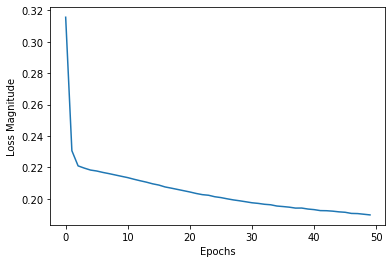

In [11]:
# Curva do erro 
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')